# Efficiency Plots for 2017:

Check efficiency plots w.r.t the reference (noringer)

In [1]:
from kepler.pandas.menu       import ElectronSequence as Chain
from kepler.pandas.readers    import load, load_in_loop, load_hdf
from core import Efficiency, restore_efficiencies
from Gaugi import mkdir_p, progressbar
import numpy as np
import pandas as pd
import collections
import os
import rootplotlib as rpl
from pprint import pprint
from copy import deepcopy
import gc
from ROOT import kBlack,kBlue,kRed,kAzure,kGreen,kMagenta,kCyan,kOrange,kGray,kYellow,kWhite,TColor,gStyle

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.16/00
Using all sub packages with ROOT dependence
INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

Applying ATLAS style settings...

Applying ATLAS style settings...

Applying ATLAS style settings...


## 1) Read all files:

In [2]:
output_path = 'output/efficiencies'
mkdir_p(output_path)

In [3]:
eff_data17_Zee_noringer = restore_efficiencies( '../data/output/emulation/data17_Zee_efficiency_noringer.root')

In [4]:
eff_data17_Zee_noringer.triggers

['HLT_e140_lhloose_nod0_noringer',
 'HLT_e17_lhvloose_nod0_noringer_L1EM15VHI',
 'HLT_e28_lhtight_nod0_noringer_ivarloose',
 'HLT_e60_lhmedium_nod0_noringer_L1EM24VHI']

In [15]:
eff_data17_Zee_v10 = restore_efficiencies( 'output/emulation/data17_Zee_efficiency_v10.root')

In [16]:
eff_data17_Zee_v10.triggers

['HLT_e140_lhloose_nod0_ringer_v10',
 'HLT_e17_lhvloose_nod0_ringer_v10_L1EM15VHI',
 'HLT_e28_lhtight_nod0_ringer_v10_ivarloose',
 'HLT_e60_lhmedium_nod0_ringer_v10_L1EM24VHI']

In [5]:
eff_data17_JF17_noringer = restore_efficiencies( '../data/output/emulation/data17_JF17_efficiency_noringer.root')

In [8]:
eff_data17_JF17_v10 = restore_efficiencies( 'output/emulation/data17_JF17_efficiency_v10.root')

In [9]:
eff_data17_JF17_v9 = restore_efficiencies( '../v9/output/emulation/data17_JF17_efficiency_v9.root')

In [10]:
eff_data17_JF17_v8 = restore_efficiencies( '../v8/output/emulation/data17_JF17_efficiency_v8.root')

In [11]:
def add_legend(x, y, legends):
    rpl.add_legend( legends,x,y,x+0.98,y+0.20,textsize=18, option='p' )

## 2) HLT_e28:

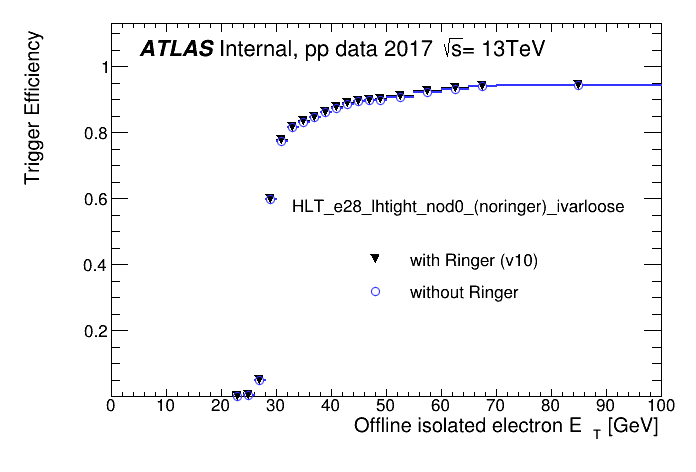

In [17]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_v10.profile('HLT_e28_lhtight_nod0_ringer_v10_ivarloose', 'HLT','et'),
            eff_data17_Zee_noringer.profile('HLT_e28_lhtight_nod0_noringer_ivarloose', 'HLT','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.49,0.35,['with Ringer (v10)', 'without Ringer'] )
rpl.add_text( 0.42, 0.55, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_v10_and_noringer_2017_HLT_et.pdf')

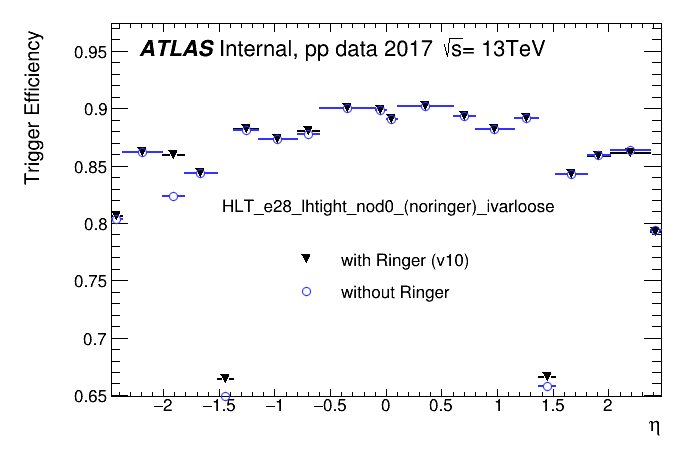

In [18]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_v10.profile('HLT_e28_lhtight_nod0_ringer_v10_ivarloose', 'HLT','eta'),
            eff_data17_Zee_noringer.profile('HLT_e28_lhtight_nod0_noringer_ivarloose', 'HLT','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.39,0.35,['with Ringer (v10)', 'without Ringer'] )
rpl.add_text( 0.32, 0.55, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.08) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_v10_and_noringer_2017_HLT_eta.pdf')

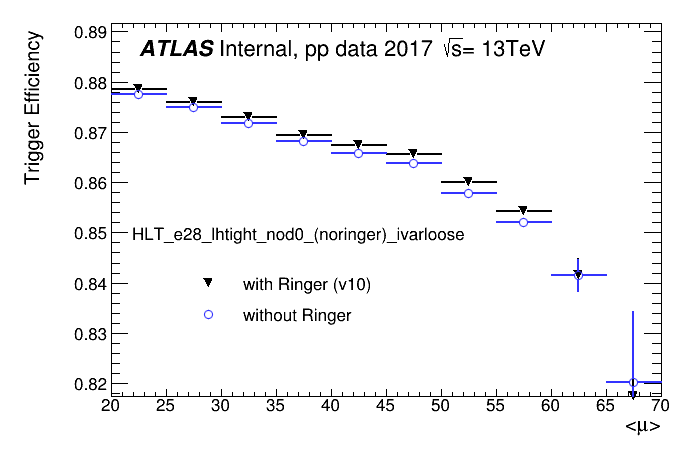

In [19]:
colors = [kBlack,kBlue-4]
markers = [23, 24]

hists = [
            eff_data17_Zee_v10.profile('HLT_e28_lhtight_nod0_ringer_v10_ivarloose', 'HLT','mu'),
            eff_data17_Zee_noringer.profile('HLT_e28_lhtight_nod0_noringer_ivarloose', 'HLT','mu'),
        ]


hists = [ rpl.hist1d.rebin( h , 10, 20, 70 ) for h in hists ]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.25,0.3,['with Ringer (v10)', 'without Ringer'] )
rpl.add_text( 0.19, 0.49, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.015) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_v10_and_noringer_2017_HLT_mu.pdf')


### 2.1) Check fake rejection for FastCalo step:

**NOTE**: For Run-2, to get the fast-calo boolean, point the histogram to L2

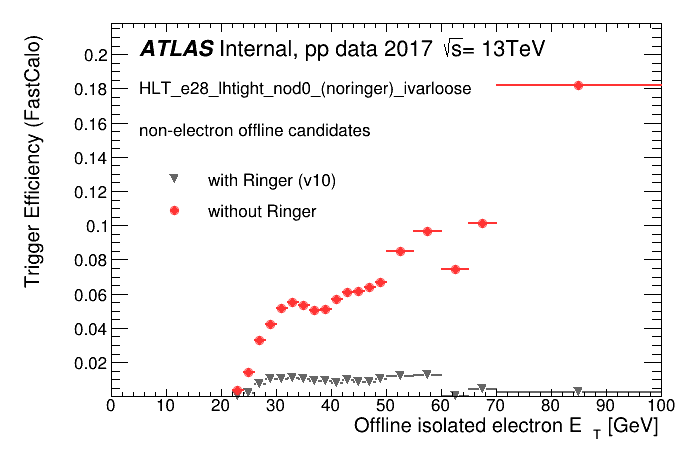

In [20]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            eff_data17_JF17_v10.profile('HLT_e28_lhtight_nod0_ringer_v10_ivarloose', 'L2Calo','et'),
            eff_data17_JF17_noringer.profile('HLT_e28_lhtight_nod0_noringer_ivarloose', 'L2Calo','et'),
        ]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
add_legend( 0.2, 0.52, ['with Ringer (v10)', 'without Ringer'] )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2 )
fig.show()

fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_v10_and_noringer_2017_L2Calo_et.pdf')

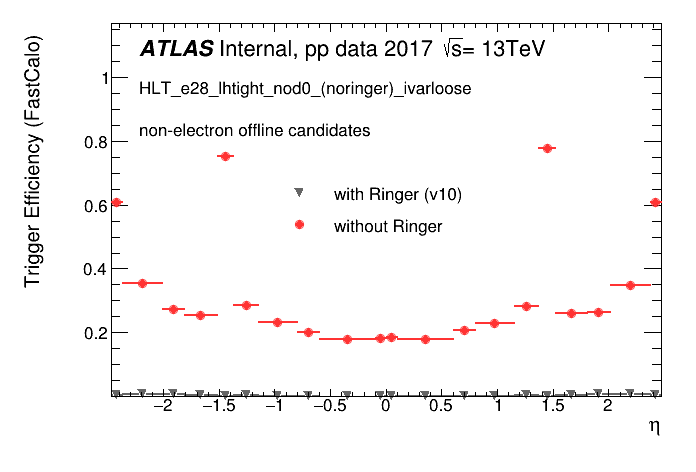

In [21]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            eff_data17_JF17_v10.profile('HLT_e28_lhtight_nod0_ringer_v10_ivarloose', 'L2Calo','eta'),
            eff_data17_JF17_noringer.profile('HLT_e28_lhtight_nod0_noringer_ivarloose', 'L2Calo','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
add_legend( 0.38, 0.49, ['with Ringer (v10)', 'without Ringer'] )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.5 )
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_v10_and_noringer_2017_L2Calo_eta.pdf')

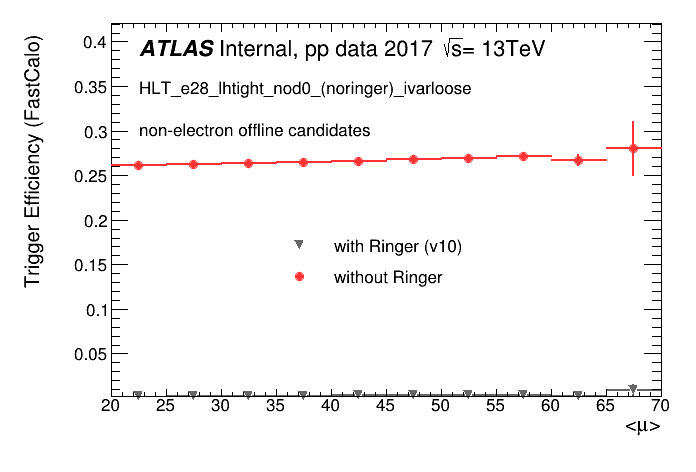

In [22]:
colors = [kGray+2,kRed-4]
markers = [23, 20]
hists = [
            eff_data17_JF17_v10.profile('HLT_e28_lhtight_nod0_ringer_v10_ivarloose', 'L2Calo','mu'),
            eff_data17_JF17_noringer.profile('HLT_e28_lhtight_nod0_noringer_ivarloose', 'L2Calo','mu'),
        ]

hists = [ rpl.hist1d.rebin( h , 10, 20, 70 ) for h in hists ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, 'HLT_e28_lhtight_nod0_(noringer)_ivarloose', textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
add_legend( 0.38, 0.38, ['with Ringer (v10)', 'without Ringer'] )
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.5 )
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_v10_and_noringer_2017_L2Calo_mu.pdf')

In [23]:
eff_data17_JF17_noringer.table('HLT_e28_lhtight_nod0_noringer_ivarloose')

HLT_e28_lhtight_nod0_noringer_ivarloose
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 90.6060  | 8384948/9254300 |
| L2Calo | 26.4611  | 2448794/9254300 |
|   L2   | 26.3965  | 2442814/9254300 |
| EFCalo | 26.0071  | 2406771/9254300 |
|  HLT   |  0.0034  |   313/9254300   |
+--------+----------+-----------------+


In [24]:
eff_data17_JF17_v8.table('HLT_e28_lhtight_nod0_ringer_v8_ivarloose')

HLT_e28_lhtight_nod0_ringer_v8_ivarloose
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 90.6060  | 8384948/9254300 |
| L2Calo |  0.8360  |  77362/9254300  |
|   L2   |  0.7923  |  73320/9254300  |
| EFCalo |  0.6545  |  60568/9254300  |
|  HLT   |  0.0018  |   167/9254300   |
+--------+----------+-----------------+


In [25]:
eff_data17_JF17_v9.table('HLT_e28_lhtight_nod0_ringer_v9_ivarloose')

HLT_e28_lhtight_nod0_ringer_v9_ivarloose
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 90.6060  | 8384948/9254300 |
| L2Calo |  0.5624  |  52044/9254300  |
|   L2   |  0.5240  |  48496/9254300  |
| EFCalo |  0.4206  |  38924/9254300  |
|  HLT   |  0.0015  |   137/9254300   |
+--------+----------+-----------------+


In [26]:
eff_data17_JF17_v10.table('HLT_e28_lhtight_nod0_ringer_v10_ivarloose')

HLT_e28_lhtight_nod0_ringer_v10_ivarloose
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 90.6060  | 8384948/9254300 |
| L2Calo |  0.2771  |  25641/9254300  |
|   L2   |  0.2542  |  23523/9254300  |
| EFCalo |  0.2119  |  19614/9254300  |
|  HLT   |  0.0008  |    75/9254300   |
+--------+----------+-----------------+


## 3) HLT_e60:

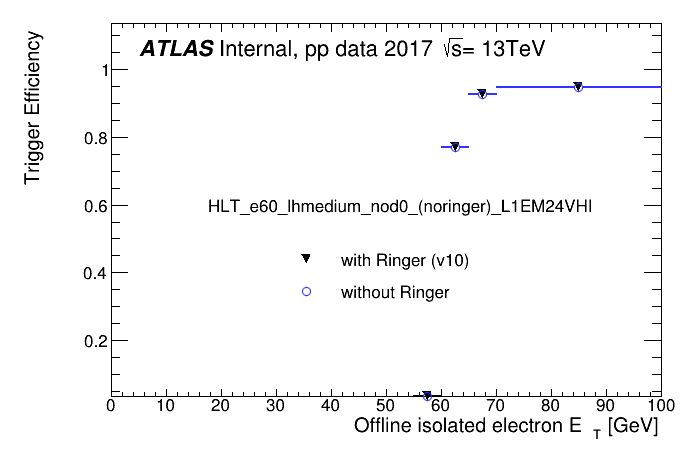

In [27]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_v10.profile('HLT_e60_lhmedium_nod0_ringer_v10_L1EM24VHI', 'HLT','et'),
            eff_data17_Zee_noringer.profile('HLT_e60_lhmedium_nod0_noringer_L1EM24VHI', 'HLT','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.39,0.35,['with Ringer (v10)', 'without Ringer'] )
rpl.add_text( 0.3, 0.55, 'HLT_e60_lhmedium_nod0_(noringer)_L1EM24VHI', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e60_ringer_v10_and_noringer_2017_HLT_et.pdf')

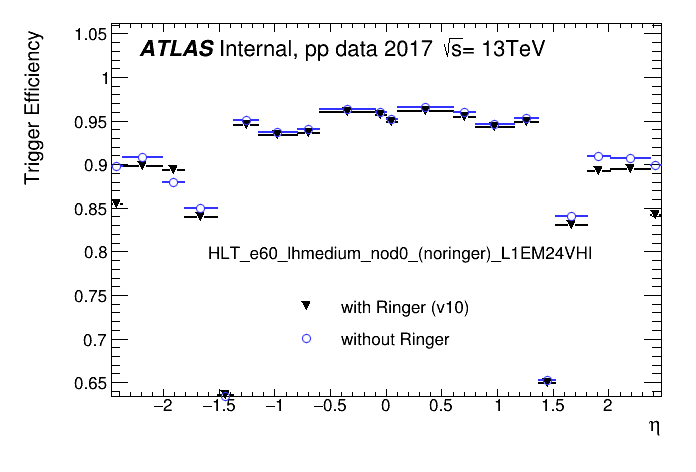

In [28]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_v10.profile('HLT_e60_lhmedium_nod0_ringer_v10_L1EM24VHI', 'HLT','eta'),
            eff_data17_Zee_noringer.profile('HLT_e60_lhmedium_nod0_noringer_L1EM24VHI', 'HLT','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.39,0.25,['with Ringer (v10)', 'without Ringer'] )
rpl.add_text( 0.3, 0.45, 'HLT_e60_lhmedium_nod0_(noringer)_L1EM24VHI', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.1) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e60_ringer_v10_and_noringer_2017_HLT_eta.pdf')

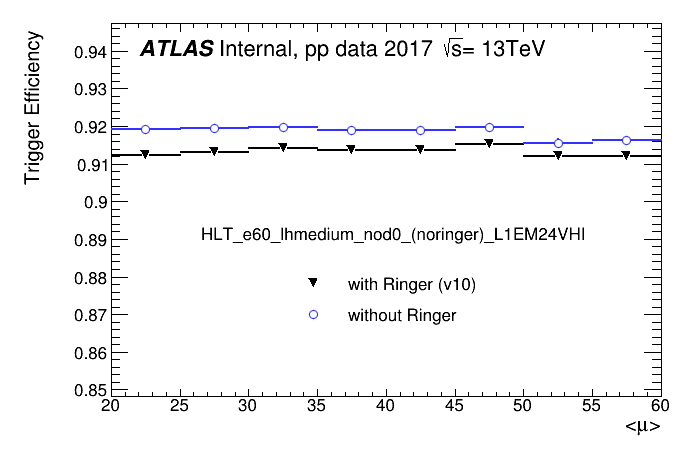

In [29]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_v10.profile('HLT_e60_lhmedium_nod0_ringer_v10_L1EM24VHI', 'HLT','mu'),
            eff_data17_Zee_noringer.profile('HLT_e60_lhmedium_nod0_noringer_L1EM24VHI', 'HLT','mu'),
        ]


hists = [ rpl.hist1d.rebin( h , 8, 20, 60 ) for h in hists ]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.4,0.3,['with Ringer (v10)', 'without Ringer'] )
rpl.add_text( 0.29, 0.49, 'HLT_e60_lhmedium_nod0_(noringer)_L1EM24VHI', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.03, yminf=0.93) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e60_ringer_v10_and_noringer_2017_HLT_mu.pdf')

### 3.1) Check FasctCalo fake rejection

In [30]:
eff_data17_JF17_noringer.table('HLT_e60_lhmedium_nod0_noringer_L1EM24VHI')

HLT_e60_lhmedium_nod0_noringer_L1EM24VHI
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 99.9012  | 7844422/7852181 |
| L2Calo | 34.4354  | 2703931/7852181 |
|   L2   | 34.3616  | 2698132/7852181 |
| EFCalo | 33.8804  | 2660352/7852181 |
|  HLT   |  0.0059  |   463/7852181   |
+--------+----------+-----------------+


In [31]:
eff_data17_JF17_v8.table('HLT_e60_lhmedium_nod0_ringer_v8_L1EM24VHI')

HLT_e60_lhmedium_nod0_ringer_v8_L1EM24VHI
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 99.9012  | 7844422/7852181 |
| L2Calo |  0.8335  |  65446/7852181  |
|   L2   |  0.7826  |  61451/7852181  |
| EFCalo |  0.6158  |  48353/7852181  |
|  HLT   |  0.0026  |   203/7852181   |
+--------+----------+-----------------+


In [32]:
eff_data17_JF17_v9.table('HLT_e60_lhmedium_nod0_ringer_v9_L1EM24VHI')

HLT_e60_lhmedium_nod0_ringer_v9_L1EM24VHI
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 99.9012  | 7844422/7852181 |
| L2Calo |  0.5304  |  41647/7852181  |
|   L2   |  0.4845  |  38044/7852181  |
| EFCalo |  0.3575  |  28074/7852181  |
|  HLT   |  0.0018  |   139/7852181   |
+--------+----------+-----------------+


In [34]:
eff_data17_JF17_v10.table('HLT_e60_lhmedium_nod0_ringer_v10_L1EM24VHI')

HLT_e60_lhmedium_nod0_ringer_v10_L1EM24VHI
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 99.9012  | 7844422/7852181 |
| L2Calo |  0.1634  |  12829/7852181  |
|   L2   |  0.1357  |  10656/7852181  |
| EFCalo |  0.0846  |   6641/7852181  |
|  HLT   |  0.0005  |    39/7852181   |
+--------+----------+-----------------+


## 4) HLT_e140:

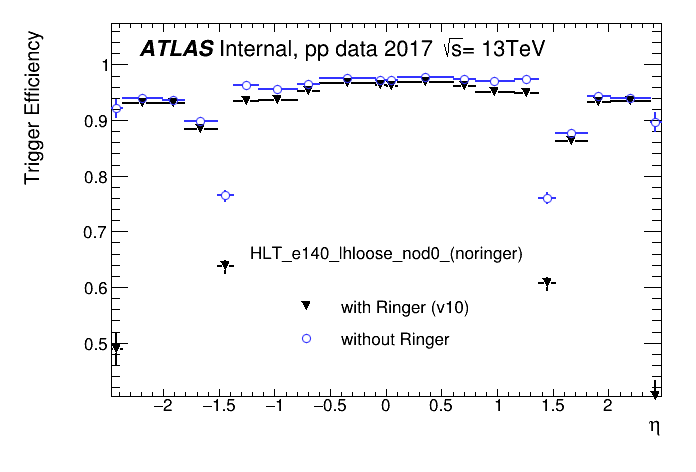

In [35]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_v10.profile('HLT_e140_lhloose_nod0_ringer_v10', 'HLT','eta'),
            eff_data17_Zee_noringer.profile('HLT_e140_lhloose_nod0_noringer', 'HLT','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.39,0.25,['with Ringer (v10)', 'without Ringer'] )
rpl.add_text( 0.36, 0.45, 'HLT_e140_lhloose_nod0_(noringer)', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.1) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e140_ringer_v10_and_noringer_2017_HLT_eta.pdf')

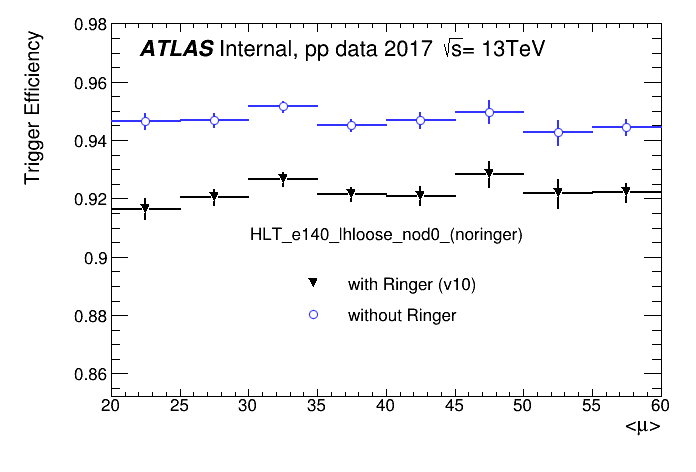

In [36]:
colors = [kBlack,kBlue-4]
markers = [23, 24]
hists = [
            eff_data17_Zee_v10.profile('HLT_e140_lhloose_nod0_ringer_v10', 'HLT','mu'),
            eff_data17_Zee_noringer.profile('HLT_e140_lhloose_nod0_noringer', 'HLT','mu'),
        ]


hists = [ rpl.hist1d.rebin( h , 8, 20, 60 ) for h in hists ]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.4,0.3,['with Ringer (v10)', 'without Ringer'] )
rpl.add_text( 0.36, 0.49, 'HLT_e140_lhloose_nod0_(noringer)', textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.03, yminf=0.93) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e140_ringer_v10_and_noringer_2017_HLT_mu.pdf')

### 4.1) Chck FastCalo Fake rejection:

In [37]:
eff_data17_JF17_noringer.table('HLT_e140_lhloose_nod0_noringer')

HLT_e140_lhloose_nod0_noringer
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 99.9227  | 5629684/5634041 |
| L2Calo | 94.5886  | 5329159/5634041 |
|   L2   | 69.0642  | 3891106/5634041 |
| EFCalo | 67.8555  | 3823006/5634041 |
|  HLT   |  0.0715  |   4031/5634041  |
+--------+----------+-----------------+


In [38]:
eff_data17_JF17_v8.table('HLT_e140_lhloose_nod0_ringer_v8')

HLT_e140_lhloose_nod0_ringer_v8
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 99.9227  | 5629684/5634041 |
| L2Calo |  2.0564  |  115858/5634041 |
|   L2   |  1.9617  |  110523/5634041 |
| EFCalo |  1.6871  |  95050/5634041  |
|  HLT   |  0.0488  |   2752/5634041  |
+--------+----------+-----------------+


In [39]:
eff_data17_JF17_v9.table('HLT_e140_lhloose_nod0_ringer_v9')

HLT_e140_lhloose_nod0_ringer_v9
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 99.9227  | 5629684/5634041 |
| L2Calo |  1.4126  |  79588/5634041  |
|   L2   |  1.3309  |  74982/5634041  |
| EFCalo |  1.0973  |  61825/5634041  |
|  HLT   |  0.0391  |   2204/5634041  |
+--------+----------+-----------------+


In [40]:
eff_data17_JF17_v10.table('HLT_e140_lhloose_nod0_ringer_v10')

HLT_e140_lhloose_nod0_ringer_v10
+--------+----------+-----------------+
|  Step  | Eff [%%] |   passed/total  |
+--------+----------+-----------------+
| L1Calo | 99.9227  | 5629684/5634041 |
| L2Calo |  0.3929  |  22134/5634041  |
|   L2   |  0.3405  |  19182/5634041  |
| EFCalo |  0.2276  |  12825/5634041  |
|  HLT   |  0.0102  |   577/5634041   |
+--------+----------+-----------------+
